In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\prave\\OneDrive\\Desktop\\Git\\MachineLearning\\Datasets\\Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df = df.select_dtypes(include=['int64','float64'])
df.info()  #data cleaning

In [31]:
x = df.iloc[:,1:5]
y = df.iloc[:,0]

# x-should be in 2D always
# y - should be in 1D always

In [32]:
print(x.ndim,y.ndim)

2 1


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
mul_reg = LinearRegression()

In [35]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0) #(75%,25%), test_size=0.2 (80,20)

In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(408, 4)
(137, 4)
(408,)
(137,)


In [45]:
mul_reg.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred = mul_reg.predict(x_test)
y_pred

array([ 4079877.37337016,  5941620.07745067,  4174629.63710048,
        7108881.01968879,  4257656.82170367,  6806995.35968952,
        3546285.80164872,  3864006.69340187,  3087044.19751041,
        8697352.40110972,  7451944.63206192,  4063271.93644952,
        3851552.6157114 ,  4463736.19151394,  4432600.99728775,
        2956792.7909661 ,  4134574.04192557,  4447130.7545933 ,
        3706255.04265582,  3497198.48945015,  6611597.65458011,
        5905866.58545302,  4495013.2963861 ,  3125064.75043351,
        5555827.49033777,  4535918.03950044,  4853963.95914892,
        4777305.72403693,  6349736.99518474,  4613185.12379968,
        3455684.89714856,  3835089.08943672,  5906475.43464027,
        3306235.96486282,  3714557.76111614,  4302562.18010107,
        5229074.88156096,  3679686.3435828 ,  2742380.10812449,
        3322254.31386608,  8170858.77744283,  6467788.67322223,
        7049991.7852998 ,  4229184.39500994,  3409290.94705347,
        6661697.78663394,  3674977.93778

In [52]:
y_test

239     4585000
113     6083000
325     4007500
66      6930000
479     2940000
         ...   
319     4060000
525     2345000
245     4550000
7      10150000
375     3640000
Name: price, Length: 137, dtype: int64

In [55]:
print(y_test.shape,y_pred.shape)

(137,) (137,)


In [59]:
pd.DataFrame({'actual':y_test,'predicted':y_pred})

,actual,predicted
239,4585000,4.079877e+06
113,6083000,5.941620e+06
325,4007500,4.174630e+06
66,6930000,7.108881e+06
479,2940000,4.257657e+06
...,...,...
319,4060000,4.454988e+06
525,2345000,3.140182e+06
245,4550000,4.644462e+06
7,10150000,1.234284e+07


In [62]:
from sklearn.metrics import r2_score,mean_squared_error

For regression tasks, R² values:

    > 0.8 are generally strong.

    0.5 – 0.8 are moderate.

    < 0.5 are weak.

In [64]:
r2_score(y_test,y_pred)

0.5389080300008642

In [94]:
mse = mean_squared_error(y_test,y_pred)
mse

1423153678365.0002

In [97]:
# RMS
import math 
math.sqrt(mse)

1192960.0489391924

In [ ]:
For mult linear regression 
y = x1*m1 + x2*m2 + x3*m3 ...  + b 

In [85]:
Print(mul_reg.coef_)

array([4.15135923e+02, 3.18925662e+05, 1.28022738e+06, 4.71321183e+05])

In [86]:
print(mul_reg.intercept_)

-760313.0556713222


In [66]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Predicted Price')

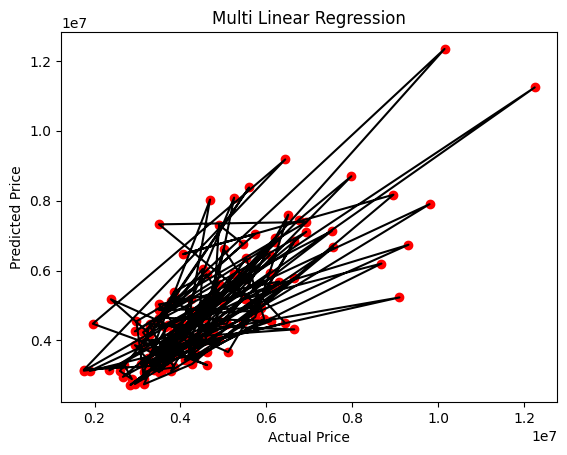

In [73]:
plt.title('Multi Linear Regression')
plt.scatter(y_test,y_pred,c='r')
plt.plot(y_test,y_pred,c='black')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [74]:
x.head()

,area,bedrooms,bathrooms,stories
0,7420,4,2,3
1,8960,4,4,4
2,9960,3,2,2
3,7500,4,2,2
4,7420,4,1,2


In [77]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [78]:
mul_reg.predict([[7420,4,2,3]])

C:\Users\prave\anaconda3\envs\tensorFlow\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7570116.4594755])

In [80]:
x.tail()

,area,bedrooms,bathrooms,stories
540,3000,2,1,1
541,2400,3,1,1
542,3620,2,1,1
543,2910,3,1,1
544,3850,3,1,2


In [83]:
y.tail()

540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, dtype: int64

In [84]:
mul_reg.predict([[2910,3,1,1]])

C:\Users\prave\anaconda3\envs\tensorFlow\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3156058.03401375])

In [89]:
predicted_values = 2910*4.15135923e+02 + 3*3.18925662e+05 + 1*1.28022738e+06 + 1*4.71321183e+05 + -760313.0556713222

print(predicted_values)

3156058.0292586777


To save trained model

In [99]:
import pickle as pk

In [100]:
# serialize to create ml modle using pk library
pk.dump(mul_reg,open('multi_reg_model.pkl','wb'))

In [101]:
# deserialize to use the trained ml model
mul_re = pk.load(open('multi_reg_model.pkl','rb'))

In [102]:
mul_re.predict([[2400,3,2,2]])

C:\Users\prave\anaconda3\envs\tensorFlow\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4695887.28050753])